<a href="https://colab.research.google.com/github/vicarweb/easy_python/blob/master/dogs_cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Gradio Pets

In [ ]:
!pip install -Uqq fastai

     |████████████████████████████████| 197 kB 30.1 MB/s 
     |████████████████████████████████| 60 kB 7.6 MB/s 


In [ ]:
from fastai.vision.all import *

def is_cat(x): return x[0].isupper() 

In [ ]:
path = untar_data(URLs.PETS)/'images'

dls = ImageDataLoaders.from_name_func('.',
    get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat,
    item_tfms=Resize(192))

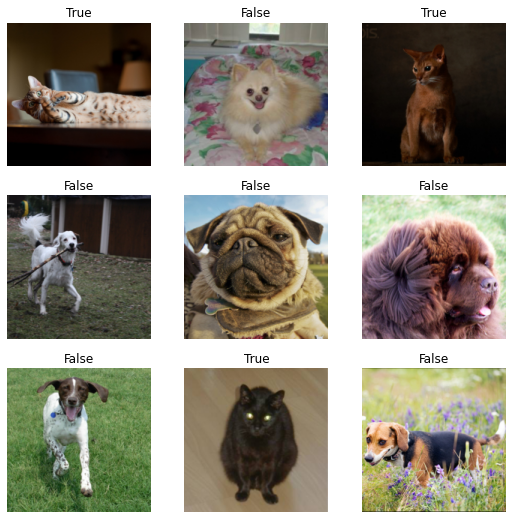

In [ ]:
dls.show_batch()

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,0.199251,0.055582,0.016915,00:44


epoch,train_loss,valid_loss,error_rate,time
0,0.073143,0.059040,0.013532,00:45
1,0.045075,0.040870,0.011502,00:45
2,0.020936,0.035669,0.009472,00:44


In [ ]:
learn.export('model.pkl')